In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3c16c684f83051c3c43480e860fd86c


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | san cristobal
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | berdigestyakh
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | shubarshi
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | sehithwa
Processing Record 19 of Set 1 | okha
Processing Record 20 of Set 1 | tasiilaq
Processing

Processing Record 38 of Set 4 | sola
Processing Record 39 of Set 4 | dukat
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | santa lucia
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | ketchikan
Processing Record 45 of Set 4 | suicheng
Processing Record 46 of Set 4 | durango
Processing Record 47 of Set 4 | tecoanapa
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | tateyama
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | lampa
Processing Record 5 of Set 5 | yarada
Processing Record 6 of Set 5 | asau
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | luanda
Processing Record 10 of Set 5 | inirida
Processing Record 11 of Set 5 | atambua
Processing Reco

Processing Record 25 of Set 8 | chake chake
Processing Record 26 of Set 8 | todos santos
Processing Record 27 of Set 8 | tessalit
Processing Record 28 of Set 8 | voyvozh
Processing Record 29 of Set 8 | kaitangata
Processing Record 30 of Set 8 | jimenez
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | san andres
Processing Record 33 of Set 8 | kaeo
Processing Record 34 of Set 8 | daoukro
Processing Record 35 of Set 8 | yumen
Processing Record 36 of Set 8 | contamana
Processing Record 37 of Set 8 | namuac
Processing Record 38 of Set 8 | northam
Processing Record 39 of Set 8 | deputatskiy
Processing Record 40 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | uvat
Processing Record 43 of Set 8 | ust-kuyga
Processing Record 44 of Set 8 | price
Processing Record 45 of Set 8 | baracoa
Processing Record 46 of Set 8 | chagda
City not found. Skipping...
Processing Record 47 of Set 8 | carutapera
P

Processing Record 14 of Set 12 | illela
Processing Record 15 of Set 12 | yashkul
Processing Record 16 of Set 12 | sorland
Processing Record 17 of Set 12 | akyab
Processing Record 18 of Set 12 | touros
Processing Record 19 of Set 12 | nokaneng
Processing Record 20 of Set 12 | kokkola
Processing Record 21 of Set 12 | lavrentiya
Processing Record 22 of Set 12 | morant bay
Processing Record 23 of Set 12 | neryungri
Processing Record 24 of Set 12 | gualeguaychu
Processing Record 25 of Set 12 | laje
Processing Record 26 of Set 12 | muhos
Processing Record 27 of Set 12 | prado
Processing Record 28 of Set 12 | sakakah
Processing Record 29 of Set 12 | douglas
Processing Record 30 of Set 12 | andenes
Processing Record 31 of Set 12 | biloela
Processing Record 32 of Set 12 | arman
Processing Record 33 of Set 12 | altay
Processing Record 34 of Set 12 | coihueco
Processing Record 35 of Set 12 | cherskiy
Processing Record 36 of Set 12 | guerrero negro
Processing Record 37 of Set 12 | paredon
Processi

In [7]:
len(city_data)

587

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,53.40,72,100,31.56,AU,2022-08-03 02:01:17
1,San Cristobal,7.7669,-72.2250,68.18,86,97,2.37,VE,2022-08-03 02:04:07
2,Richards Bay,-28.7830,32.0377,62.20,80,6,11.79,ZA,2022-08-03 02:00:36
3,Punta Arenas,-53.1500,-70.9167,41.05,84,100,6.33,CL,2022-08-03 02:02:56
4,Berdigestyakh,62.0989,126.6992,73.71,67,62,4.16,RU,2022-08-03 02:08:24
5,Mataura,-46.1927,168.8643,44.47,81,73,10.27,NZ,2022-08-03 02:00:09
6,Ushuaia,-54.8000,-68.3000,35.26,93,100,0.00,AR,2022-08-03 01:59:58
7,Shubarshi,48.5872,57.1869,70.92,57,21,6.78,KZ,2022-08-03 02:08:24
8,Longyearbyen,78.2186,15.6401,48.04,93,75,3.44,SJ,2022-08-03 02:01:01
9,Lebu,-37.6167,-73.6500,46.45,82,4,14.83,CL,2022-08-03 02:08:25


In [9]:
#re-order the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-08-03 02:01:17,-33.6500,115.3333,53.40,72,100,31.56
1,San Cristobal,VE,2022-08-03 02:04:07,7.7669,-72.2250,68.18,86,97,2.37
2,Richards Bay,ZA,2022-08-03 02:00:36,-28.7830,32.0377,62.20,80,6,11.79
3,Punta Arenas,CL,2022-08-03 02:02:56,-53.1500,-70.9167,41.05,84,100,6.33
4,Berdigestyakh,RU,2022-08-03 02:08:24,62.0989,126.6992,73.71,67,62,4.16


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

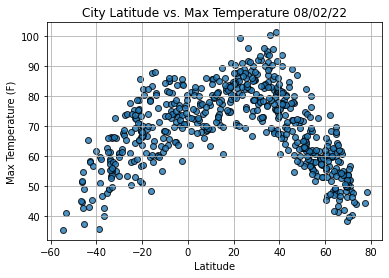

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

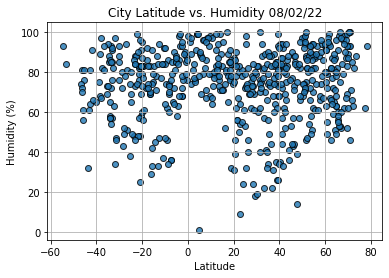

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

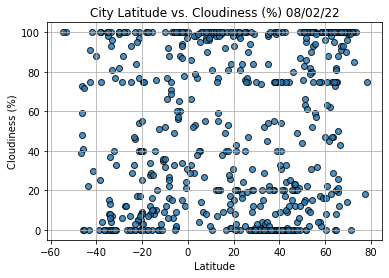

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

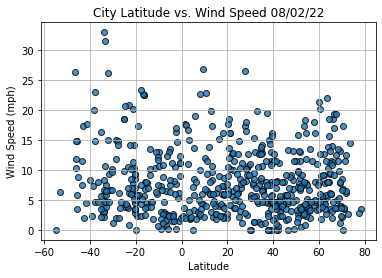

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()